## Loan Borrowers in the Prosper Loan Data 

Dataset: <br>
    **There is a total of 113937 borrowers in this dataset with the majority being employed and taking out loans for debt consolidation.
    The most common credit grade is a 'C' and most common income is 25k-74k.**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
%matplotlib inline

df = pd.read_csv('prosperLoanData.csv')

In [71]:
#drop rows with missing information
todrop = df[df['IncomeRange'] == "Not displayed"].index
df.drop(todrop, inplace=True)
todrop = df[df['IncomeRange'] == "$0"].index
df.drop(todrop, inplace=True)
todrop = df[df['CreditGrade'] == "NC"].index
df.drop(todrop, inplace=True)
todrop = df[df['CreditGrade'] == "HR"].index
df.drop(todrop, inplace=True)
#order columns with categorical variables
df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories = ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'], ordered = True)
df['CreditGrade'] = pd.Categorical(df['CreditGrade'], categories = ['E', 'D', 'C', 'B', 'A', 'AA'], ordered = True)
df['IsBorrowerHomeowner'] = pd.Categorical(df['IsBorrowerHomeowner'], categories = [False, True], ordered = True)

## Borrower income relation to credit grade and available credit

**A borrower's income is directly coorelated with credit grade. The higher the income, the higher the credit grade. 
Available credit has a positive coorelation with credit grade. The higher the credit grade the more available credit. 
A borrower with a higher income will have a higher credit grade and more available credit.
A person is more likely to have a higher credit grade if they are able to pay off money they borrowed and people in a better 
financial position has an advantage which is why they are able to have more available credit.**

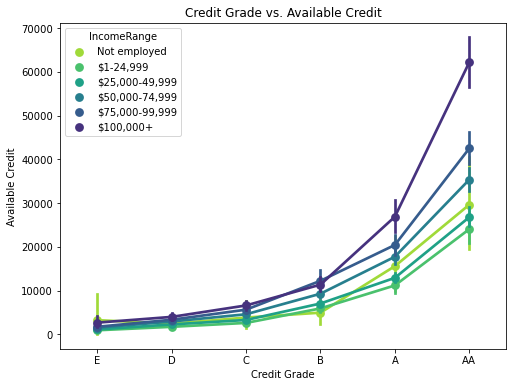

In [72]:
plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'CreditGrade', y = 'AvailableBankcardCredit', hue = 'IncomeRange', 
                  size = 4, aspect = 1.5, palette = 'viridis_r')
plt.xlabel('Credit Grade')
plt.ylabel('Available Credit')
plt.title('Credit Grade vs. Available Credit')
plt.show();

## Borrower income interest rate in relation to owning a home

**A borrower is going to have a higher interest rate if they have a lower income. 
Homeownership has a lower interest rate except if the borrower is unemployed. 
If someone is unemployed they are likely to lose their house so they are a liability for loans.
This is probably why they are the only group of borrowers that will have a higher interest rate.**

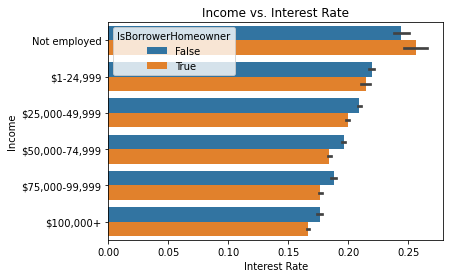

In [73]:
ax = sb.barplot(x="BorrowerRate", y="IncomeRange", data=df, hue = 'IsBorrowerHomeowner')
plt.xlabel('Interest Rate')
plt.ylabel('Income')
plt.title('Income vs. Interest Rate')
plt.show();

## Summary

**Borrower's with a higher income have a greater advantage of having lower interest rates, higher credit grades, and available credit.
The best advantage a person can give themselves for getting a loan is having a higher income. If they are unable to do that
then having a higher credit grade and owning a home will significantly make a difference in their finances.**